## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

## Getting data

In [3]:
gender_submission = pd.read_csv('gender_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

In [7]:
train_no_mc = train.drop('Cabin', axis=1)
train_no_mc = train_no_mc.dropna().copy()
train_no_mc.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,712.000000,712.000000,712.000000,712,712,712.000000,712.000000,712.000000,712,712.000000,712
unique,NaN,NaN,NaN,712,2,NaN,NaN,NaN,541,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,7,NaN,554
mean,448.589888,0.404494,2.240169,NaN,NaN,29.642093,0.514045,0.432584,NaN,34.567251,NaN
std,258.683191,0.491139,0.836854,NaN,NaN,14.492933,0.930692,0.854181,NaN,52.938648,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,222.750000,0.000000,1.000000,NaN,NaN,20.000000,0.000000,0.000000,NaN,8.050000,NaN
50%,445.000000,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,15.645850,NaN
75%,677.250000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,1.000000,NaN,33.000000,NaN


In [8]:
train_no_mc.shape

(712, 11)

In [9]:
train_no_mc_1 = train_no_mc[train_no_mc['Fare'] != 0]
train_no_mc_1.shape

(705, 11)

In [10]:
train_cleaned = train_no_mc_1.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis=1)
train_cleaned = train_cleaned.replace({'male':0, 'female':1})
train_cleaned.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


## Checking PDFs

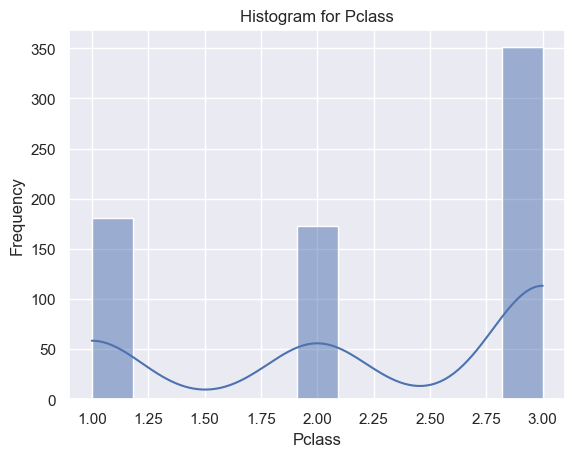

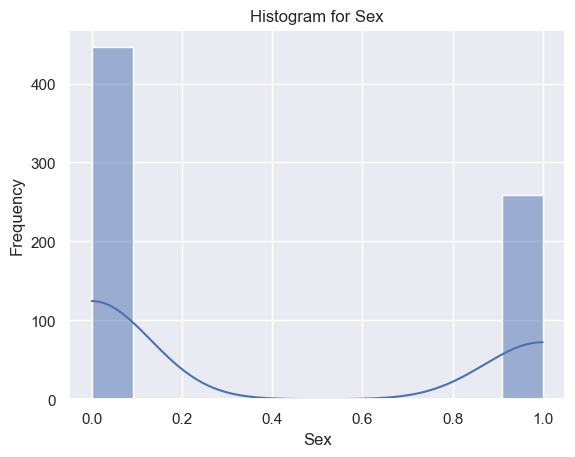

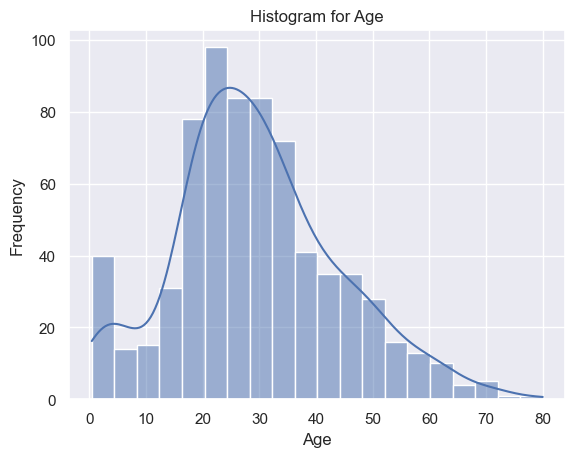

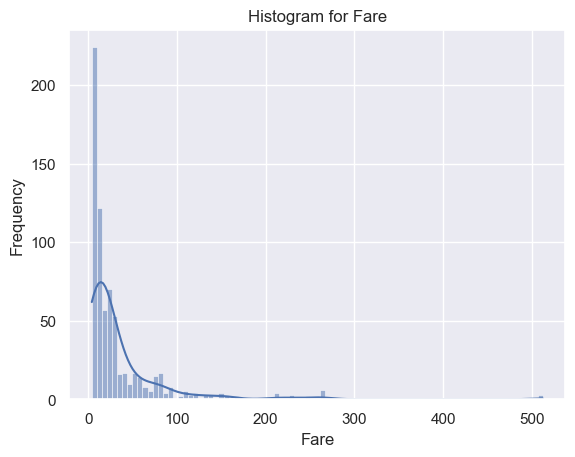

In [11]:
train_pdf = train_cleaned.drop('Survived', axis=1)

for col in train_pdf.columns:
    sns.histplot(train_pdf[col], kde=True)
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Multiple Regression

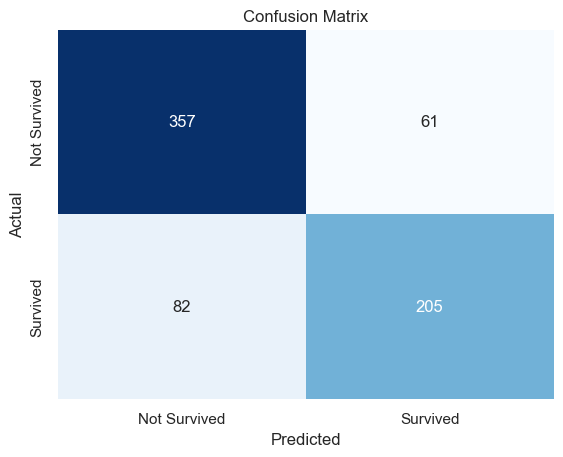

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

y = train_cleaned['Survived']
x = train_cleaned.drop('Survived', axis=1)

reg = LinearRegression()
reg.fit(x, y)
yhat = reg.predict(x)
yhat_bin = (yhat > 0.5).astype(int)

conf_matrix = confusion_matrix(y, yhat_bin)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
reg.score(x, y)

0.3913320890119327

## Testing the model

In [14]:
inputs_cleaned = test.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Embarked', 'Cabin'], axis=1)
inputs_cleaned = inputs_cleaned.dropna()
inputs = inputs_cleaned.drop('PassengerId', axis=1)
inputs = inputs.replace({'male':0, 'female':1})
inputs.head()

,Pclass,Sex,Age,Fare
0,3,0,34.5,7.8292
1,3,1,47.0,7.0000
2,2,0,62.0,9.6875
3,3,0,27.0,8.6625
4,3,1,22.0,12.2875


In [15]:
predicted = inputs_cleaned.copy()
predicted['Survived_predicted'] = reg.predict(inputs)
predicted['Survived_predicted'] = (predicted['Survived_predicted']>0.5).astype(int)
predicted.head()

,PassengerId,Pclass,Sex,Age,Fare,Survived_predicted
0,892,3,male,34.5,7.8292,0
1,893,3,female,47.0,7.0000,0
2,894,2,male,62.0,9.6875,0
3,895,3,male,27.0,8.6625,0
4,896,3,female,22.0,12.2875,1


In [16]:
gender_submission_no_mc = gender_submission.dropna()

In [17]:
predicted_vs = predicted.merge(gender_submission_no_mc, on='PassengerId', how='left')
predicted_vs

,PassengerId,Pclass,Sex,Age,Fare,Survived_predicted,Survived
0,892,3,male,34.5,7.8292,0,0
1,893,3,female,47.0,7.0000,0,1
2,894,2,male,62.0,9.6875,0,0
3,895,3,male,27.0,8.6625,0,0
4,896,3,female,22.0,12.2875,1,1
...,...,...,...,...,...,...,...
326,1301,3,female,3.0,13.7750,1,1
327,1303,1,female,37.0,90.0000,1,1
328,1304,3,female,28.0,7.7750,1,1
329,1306,1,female,39.0,108.9000,1,1


# Results

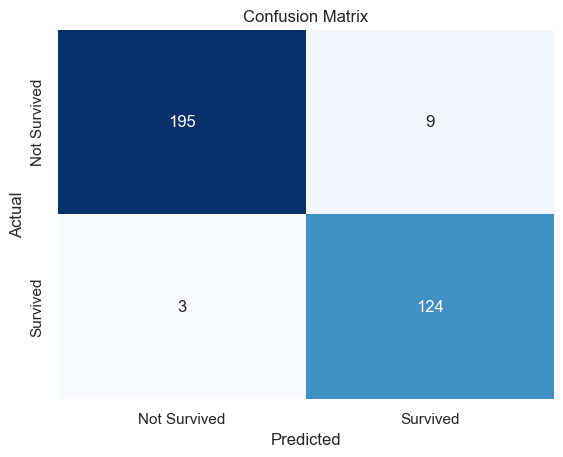

In [18]:
cm = confusion_matrix(predicted_vs['Survived'], predicted_vs['Survived_predicted'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(predicted_vs['Survived'], predicted_vs['Survived_predicted'])
precision = precision_score(predicted_vs['Survived'], predicted_vs['Survived_predicted'])
recall = recall_score(predicted_vs['Survived'], predicted_vs['Survived_predicted'])

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.96
Precision: 0.93
Recall: 0.98


In [20]:
predicted_vs.shape

(331, 7)

In [28]:
submission = predicted_vs[['PassengerId', 'Survived_predicted']]
submission = submission.rename(columns={'Survived_predicted': 'Survived'})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [29]:
submission.to_csv('submission.csv', header=True, index=False)

In [22]:
test.shape

(418, 11)